In [257]:
import csv

In [258]:
import requests
csv_url = 'https://health-infobase.canada.ca/src/data/covidLive/covid19.csv'
req = requests.get(csv_url)
url_content = req.content
csv_file = open('covid19.csv', 'wb')

csv_file.write(url_content)
csv_file.close()
#with open('covid19.csv', newline='') as f:
#    reader=csv.reader(f)
#    for row in reader:
#        print(row)

In [259]:


with open("covid19.csv","r") as file:
    data=list(csv.reader(file))
#for row in data:
#    print(row[3])

In [260]:
#data #first column province code, second column province name, 

In [261]:
import numpy as np
import matplotlib.pyplot as plt

In [262]:
data[0]

['pruid',
 'prname',
 'prnameFR',
 'date',
 'numconf',
 'numprob',
 'numdeaths',
 'numtotal',
 'numtested',
 'numrecover',
 'percentrecover',
 'ratetested',
 'numtoday',
 'percentoday',
 'ratetotal',
 'ratedeaths',
 'deathstoday',
 'percentdeath',
 'testedtoday',
 'recoveredtoday',
 'percentactive']

In [263]:
#data_pr=['10','11','12','13','24','35','46','47','48','59','60','61','62'] #all province codes 


def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

data_pr=Remove(row[0] for row in data)
names_pr=Remove(row[1] for row in data)


prev_date=data[1][3]


#rewrite dates as numbers -> for plotting (from 0 to ..)
        


In [264]:
prev_date

'31-01-2020'

In [265]:
print(data_pr)

['pruid', '35', '59', '1', '24', '48', '47', '46', '13', '10', '12', '11', '61', '62', '60', '99']


In [266]:
print(names_pr)

['prname', 'Ontario', 'British Columbia', 'Canada', 'Quebec', 'Alberta', 'Saskatchewan', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Prince Edward Island', 'Northwest Territories', 'Nunavut', 'Yukon', 'Repatriated travellers']


In [267]:
del data_pr[0]
del names_pr[0]

In [268]:
data_pr

['35',
 '59',
 '1',
 '24',
 '48',
 '47',
 '46',
 '13',
 '10',
 '12',
 '11',
 '61',
 '62',
 '60',
 '99']

In [269]:
num_row=-1
data[1][3]=1
index=1 #index of date: start from 1 ..r eventually will just go o]up by 1 each time
for row in data: #for each row
    num_row=num_row+1 #starts at 0 -> represents row number
    if num_row<2:
        continue #goes back to for loop for row 0 and row 1 (already established)
    date=row[3]
    if int(date[0:2])>= 11 and int(date[3:5])>= 3:  #date just going up by 1 (after march 11th )
        change=int(date[0:2])-int(prev_date[0:2]) 
        if change!=0: #if it changes at all 
            index=index+1 #increase date index by 1
    else:
        change=int(date[0:2])-int(prev_date[0:2]) 
        if change<0:# goign up by a month
            if int(date[3:5])==2:
                change=8 #only once -> jan 31st to feb 8th
            else:
                change=1
        index=index+change #difference between dates
    
    prev_date=date
    row[3]=index #change date 
        
        

In [270]:
for row in data:
    print(row[3])

date
1
1
1
9
9
9
17
17
17
22
22
22
25
25
25
26
26
26
27
27
27
28
28
28
30
30
30
31
31
31
31
33
33
33
33
35
35
35
35
36
36
36
36
37
37
37
37
38
38
38
38
38
39
39
39
39
39
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
58
58
58
58
58
58
58

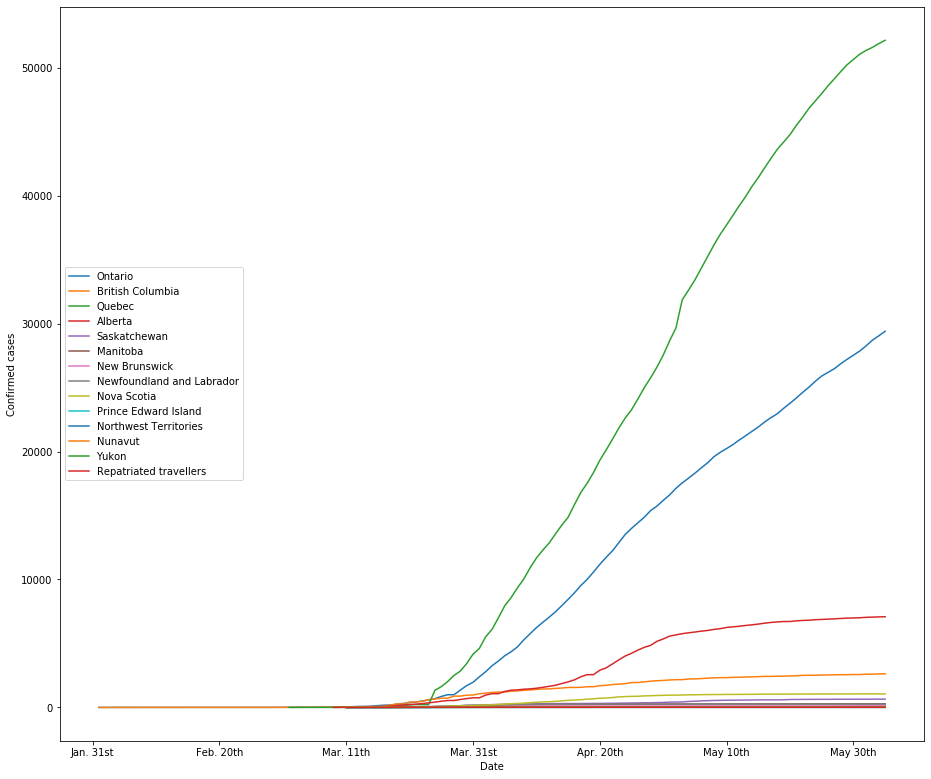

In [271]:
fig=plt.figure()
fig.set_size_inches(15.5, 13.5)
for i in range(len(data_pr)): #for each provincial code
    if data_pr[i]=='1':
        continue
    x_vec=[] #x axis 
    y_vec=[] #y axis
    for row in data: #for each data row
       # num_row=num_row+1
       # if num_row==0:
       #     continue
        if row[0]==data_pr[i]:
            x_vec.append(row[3]) #append date
            y_vec.append(int(row[4]))
    plt.plot(x_vec,y_vec, label=names_pr[i])

plt.xticks([0,20,40,60,80,100,120], ('Jan. 31st', 'Feb. 20th', 'Mar. 11th', 'Mar. 31st', 'Apr. 20th', 'May 10th','May 30th'))
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.legend(loc='center left') #bbox_to_anchor=(1, 0.5))
fig.savefig('Q2.png', bbox_inches='tight')
# Pandas
#df.myCol.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend()        
        
    

In [272]:
data_pr

['35',
 '59',
 '1',
 '24',
 '48',
 '47',
 '46',
 '13',
 '10',
 '12',
 '11',
 '61',
 '62',
 '60',
 '99']

In [131]:
y="good"

In [132]:
r==y

True

In [166]:
#for row in data:
#    print(row[4])

numconf
3
1
4
3
4
7
3
5
8
3
6
9
4
6
10
4
7
11
5
7
12
6
7
13
8
7
15
15
8
1
24
20
12
1
33
22
21
2
45
28
21
2
51
28
27
2
57
31
27
3
1
62
34
32
4
7
77
39
14
0
0
42
7
0
0
0
0
0
0
0
1
103
46
19
0
0
59
13
0
0
0
0
0
0
0
1
138
53
23
0
1
79
17
0
1
0
0
0
0
0
2
176
64
29
0
1
79
17
0
1
0
0
0
0
0
2
193
73
39
0
4
103
24
0
1
0
1
0
0
0
4
249
73
56
1
4
145
39
0
1
0
1
0
0
0
4
324
103
74
2
7
177
50
0
2
0
1
0
0
0
8
424
186
97
2
8
189
74
0
2
1
1
0
0
0
9
569
271
146
8
17
258
121
1
7
5
2
0
0
0
10
846
271
195
8
17
311
139
3
7
5
2
0
0
0
13
971
424
226
25
11
377
202
3
9
9
2
0
1
0
13
1302
424
259
33
11
425
221
3
9
28
3
0
1
0
13
1430
472
301
65
11
503
221
4
9
41
3
2
1
0
13
1646
617
358
72
11
588
221
4
18
51
3
2
1
0
13
1959
659
419
86
11
688
1339
67
26
68
5
3
1
0
13
3385
725
486
95
11
858
1629
82
33
73
9
3
1
0
13
4018
725
542
104
25
993
2021
102
45
90
11
3
1
0
13
4675
884
542
134
25
993
2498
120
51
110
11
4
1
0
13
5386
884
621
134
69
1355
2840
135
66
122
11
4
1
0
13
6255
960
690
175
83
1706
3430
148
68
127
18
5
1
0